# Check DL1 production
The purpose of this notebook is to compare the DL1 files accross different productions

In [1]:
import ctaplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lstchain.io.io import dl1_params_lstcam_key
import copy
import os

/anaconda3/envs/cta-dev/lib/python3.7/site-packages/corsikaio/subblocks/dtypes.py:20: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dict(**dt))
/anaconda3/envs/cta-dev/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%matplotlib notebook

In [4]:
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

## File discovery on LST cluster

In [5]:
def list_productions(basedir):
    basedir = os.path.abspath(basedir)
    n = len(basedir.split('/'))
    prod_list = []
    for root, dirs, files  in os.walk(basedir):
        r = root.replace(basedir, '/')
        if len(root.split('/')) == n+4:
            prod_list.append(root)
    return prod_list


basedir = '/fefs/aswg/data/mc/DL1/'
prod_list = list_productions(basedir)

for p in prod_list:
    ll = os.listdir(p)
    for file in ll:
        if file.endswith('.h5'):
            print(os.path.join(p, file))

In [6]:
ls /Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/

Untitled.ipynb
dl1_20190415_electron_south_pointing_20190323_testing-noimage.h5
dl1_20190415_electron_south_pointing_20190323_training-noimage.h5
dl1_20190415_gamma-diffuse_south_pointing_20190923_testing-noimage.h5
dl1_20190415_gamma-diffuse_south_pointing_20190923_training.h5
dl1_20190415_gamma_south_pointing_20190323_testing-noimage.h5
dl1_20190415_gamma_south_pointing_20190323_training-noimage.h5
dl1_20190415_proton_south_pointing_20190923_testing-noimage.h5
dl1_20190415_proton_south_pointing_20190923_training.h5
dl1_electron_proton_merge_for_cls.h5
dl2_results/
dl2_trained_with_elec/
experiments/
quick_look.ipynb
testhipecta/
testing/
trained_models/
trained_with_elec/


In [18]:
class hist_df:
    def __init__(self, dataframe=None, window_width=14):
        self.columns = []
        self.options = dict(bins=100, histtype='step', density=True, linewidth=3)
        self._window_width = window_width
        self._ncol = 5
        self.dataframes = {}
        self._iterator_dataframes=0
        
        if dataframe is not None:
            self.plot_data(dataframe)

    
    def get_options(self):
        if 'axes' in self.options:
            self.options.remove('axes')
        if 'label' in self.options:
            self.options.remove('label')
        return self.options
    
    @property
    def ncol(self):
        return self._ncol
    
    @ncol.setter
    def ncol(self, value):
        assert isinstance(value, int), 'Expecting an int'
        self._ncol = min(len(self.columns), value)
        
    @property
    def nrow(self):
        n = len(self.columns)
        return n//self.ncol + int(n%self.ncol>0)
   
    @property
    def axes(self):
        return self._fig.get_axes()
    
    def add_dataframe(self, dataframe):
        try:
            name = dataframe.name
        except:
            name = str(self._iterator_dataframes)
            dataframe.name = name
            self._iterator_dataframes+=1   
        self.dataframes[name] = dataframe
        
    def plot_data(self, dataframe):
        self.add_dataframe(dataframe)
        
        if self.columns == []:
            self.columns = list(dataframe.columns)
            n = len(self.columns)
            fig, axes = plt.subplots(self.nrow, self.ncol, figsize=(self._window_width, self._window_width/5*self.nrow))
            self._fig = fig
            fig.tight_layout()
            for ii, c in enumerate(self.columns):
                axes.ravel()[ii].hist(dataframe[c], **self.get_options(), label=dataframe.name)
                axes.ravel()[ii].set_title(c)
                axes.ravel()[ii].legend()

        else:
            s = np.intersect1d(self.columns, dataframe.columns)
            for ii, c in enumerate(self.columns):
                if c in s:
                    self.axes[ii].hist(dataframe[c], **self.get_options(), label=dataframe.name)
                    self.axes[ii].legend()
        

In [19]:
df1 = pd.read_hdf('/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_gamma_south_pointing_20190323_training-noimage.h5',
                 key=dl1_params_lstcam_key,
                 )

df2 = pd.read_hdf('/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_proton_south_pointing_20190923_testing-noimage.h5',
                  key=dl1_params_lstcam_key,
                 )


In [20]:
# h = hist_df(window_width=12)

In [21]:
# h = hist_df(df1, window_width=16)
# h._fig.tight_layout()

In [22]:
# h.plot_data(df2)

In [23]:
from ipywidgets import widgets

In [24]:
basedir = '/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/'
plot_list = [os.path.join(basedir, f) for f in os.listdir(basedir) if f.endswith('.h5')]

In [25]:
widgets.Dropdown(decription='file list',
                 options=plot_list,
                )

Dropdown(options=('/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_gamma-diffuse_south_pointing…

Dropdown(description='DL1 file list to plot', options=('/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_…

/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_electron_south_pointing_20190323_testing-noimage.h5


<IPython.core.display.Javascript object>


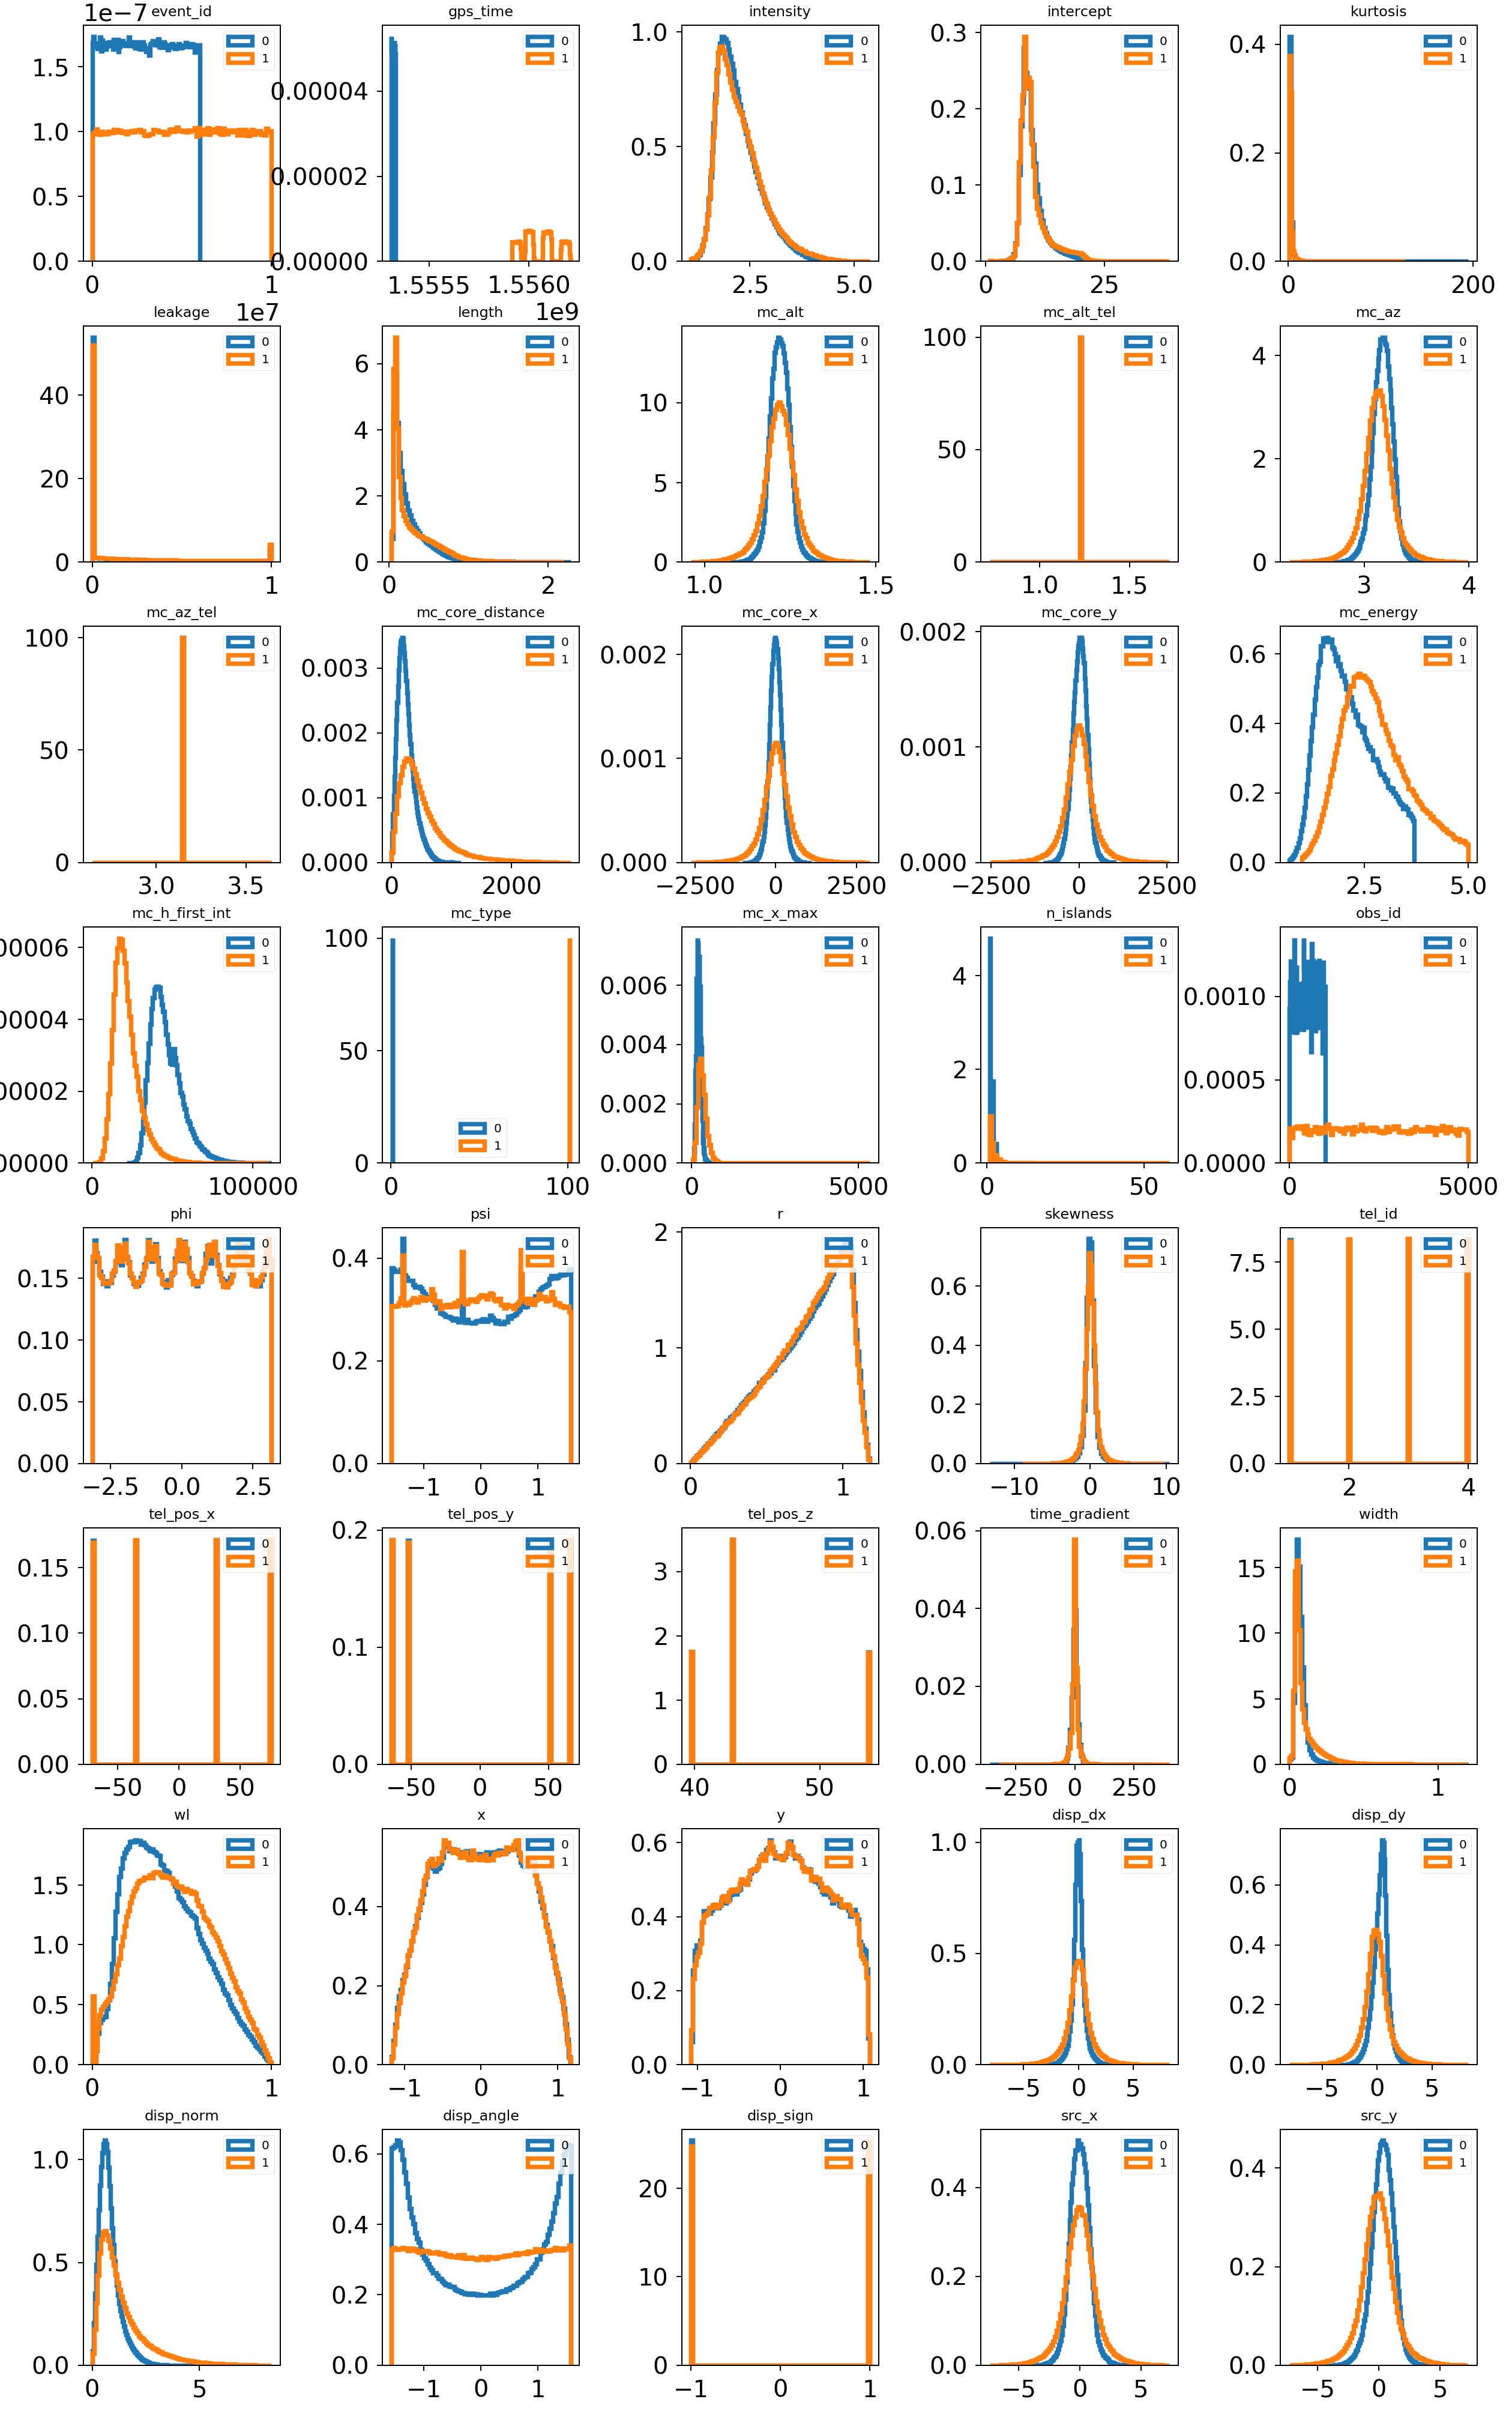

/anaconda3/envs/cta-dev/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/cta-dev/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


changed to /Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_electron_south_pointing_20190323_testing-noimage.h5
/Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_proton_south_pointing_20190923_testing-noimage.h5
changed to /Users/thomasvuillaume/Work/CTA/Data/DL1/20190923/dl1_20190415_proton_south_pointing_20190923_testing-noimage.h5


In [26]:
h = hist_df(window_width=14)

w = widgets.Dropdown(
    options=plot_list,
    description='DL1 file list to plot',
    value=None
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print(change['new'])
        df = pd.read_hdf(change['new'], key=dl1_params_lstcam_key)
        h.plot_data(df)
        print("changed to %s" % change['new'])

w.observe(on_change)

display(w)


In [27]:
df = df1[:10000]

In [37]:
#Create Div with DataFrame:
from bokeh.models import Div
div_df = Div(text=df.head(10).to_html(index=False), 
             width=550)

#Create Scatterplot:
p_scatter = df.plot_bokeh(
    kind="scatter",
    x="intensity",
    y="mc_energy",
#     category="species",
    title="test",
    show_figure=False,
    alpha=0.2,
    size=0.1
)

#Combine Div and Scatterplot via grid layout:
pandas_bokeh.plot_grid([[div_df, p_scatter]], 
                       plot_width=400, 
                       plot_height=350)

Column(id='1907', ...)

In [49]:
from scipy.stats import gaussian_kde
x = df.mc_energy
y = df.intensity
xy = np.vstack([x, y])
z = gaussian_kde(xy)

In [47]:
import bokeh

In [48]:
p = figure()

In [ ]:
from bokeh.

In [53]:
p.Scatter(x, y, c=z)
show(p)

AttributeError: unexpected attribute 'c' to Scatter, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, marker, name, size, subscribed_events, tags, x or y

In [46]:
p_scatter = df.plot_bokeh(
    kind="scatter",
    x="intensity",
    y="mc_energy",
#     category="species",
    title="test",
    show_figure=False,
    alpha=0.7,
    size=0.5,
    c=z,
#     figsize=(15,7)
)

show(p_scatter)

In [36]:
# produce an image of the 2d histogram
from bokeh.plotting import figure, show
from bokeh.layouts import row

# p = figure()

# p.image(image=[H], x=xe[0], y=ye[0], dw=xe[-1] - xe[0], dh=ye[-1] - ye[0], palette="Spectral11")

# produce hexbin plot
p2 = figure(title="Hexbin", match_aspect=True)
# p.grid.visible = False

r, bins = p2.hexbin(df.intensity, df.mc_energy, size=0.04, hover_color="pink", hover_alpha=0.8, palette='Spectral11')

show(p2)